In [1]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor
import os
import pandas as pd
from torchvision.io import read_image
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

def mytransform(img):
        img=((img/256)-0.5)*2
        return img

    
class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=mytransform, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [2]:
trainset=CustomImageDataset('my_mahjong_dataset/datas/train_label.csv','my_mahjong_dataset/datas/train')
train_dataloader = DataLoader(trainset, batch_size=1, shuffle=True)
testset=CustomImageDataset('my_mahjong_dataset/datas/test_label.csv','my_mahjong_dataset/datas/test')
test_dataloader = DataLoader(testset, batch_size=1, shuffle=True)

In [3]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(3, 3)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*9*5, 2000)
        self.fc2 = nn.Linear(2000, 2000)
        self.fc3 = nn.Linear(2000, 2000)
        self.fc4 = nn.Linear(2000, 2000)
        self.fc5 = nn.Linear(2000, 27)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        #print(x.shape)
        x = torch.flatten(x,1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        return x


net = Net().cuda()

In [4]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [5]:
def test():
    correct=0
    i=0
    with torch.no_grad():
        for batch, data in enumerate(test_dataloader, 0):
            i+=1
            inputs, labels = data
            inputs, labels=inputs.cuda(), labels.cuda()
            #print(inputs.shape)
            outputs = net(inputs)
            _,p=torch.max(outputs.data, 1)
            correct += (p == labels).sum().item()
        print('acc:',correct/i)

In [6]:
# train
for epoch in range(25):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_dataloader, 0):
        inputs, labels = data
        inputs, labels=inputs.cuda(), labels.cuda()
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 99:
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 500:.3f}')
            running_loss = 0.0
            test()

print('Finished Training')

[1,   100] loss: 0.659
acc: 0.037383177570093455
[1,   200] loss: 0.662
acc: 0.037383177570093455
[2,   100] loss: 0.659
acc: 0.07476635514018691
[2,   200] loss: 0.660
acc: 0.037383177570093455
[3,   100] loss: 0.659
acc: 0.1308411214953271
[3,   200] loss: 0.659
acc: 0.037383177570093455
[4,   100] loss: 0.658
acc: 0.07476635514018691
[4,   200] loss: 0.659
acc: 0.11214953271028037
[5,   100] loss: 0.657
acc: 0.18691588785046728
[5,   200] loss: 0.658
acc: 0.06542056074766354
[6,   100] loss: 0.656
acc: 0.11214953271028037
[6,   200] loss: 0.655
acc: 0.04672897196261682
[7,   100] loss: 0.652
acc: 0.18691588785046728
[7,   200] loss: 0.649
acc: 0.1308411214953271
[8,   100] loss: 0.637
acc: 0.08411214953271028
[8,   200] loss: 0.612
acc: 0.21495327102803738
[9,   100] loss: 0.537
acc: 0.40186915887850466
[9,   200] loss: 0.434
acc: 0.3644859813084112
[10,   100] loss: 0.332
acc: 0.2897196261682243
[10,   200] loss: 0.275
acc: 0.38317757009345793
[11,   100] loss: 0.296
acc: 0.6261682

In [7]:
PATH = './myclassifier_net.pth'
torch.save(net.state_dict(), PATH)

In [8]:
test()

acc: 0.9532710280373832


In [9]:
import matplotlib.pyplot as plt

def show():
    dic={}
    dic['0']='1m'
    dic['1']='2m'
    dic['2']='3m'
    dic['3']='4m'
    dic['4']='5m'
    dic['5']='6m'
    dic['6']='7m'
    dic['7']='8m'
    dic['8']='9m'
    dic['9']='1p'
    dic['10']='2p'
    dic['11']='3p'
    dic['12']='4p'
    dic['13']='5p'
    dic['14']='6p'
    dic['15']='7p'
    dic['16']='8p'
    dic['17']='9p'
    dic['18']='1s'
    dic['19']='2s'
    dic['20']='3s'
    dic['21']='4s'
    dic['22']='5s'
    dic['23']='6s'
    dic['24']='7s'
    dic['25']='8s'
    dic['26']='9s'
        
    figure = plt.figure(figsize=(8, 8))
    cols, rows = 6, 4
    for i in range(1, cols * rows + 1):
        sample_idx = torch.randint(len(testset), size=(1,)).item()
        img, label = testset[sample_idx]
        inputs=torch.unsqueeze(img,0).cuda()
        with torch.no_grad():
            out=net(inputs)
        _,out=torch.max(out.data, 1)
        out=dic[str(int(out))]
        figure.add_subplot(rows, cols, i)
        plt.title(dic[str(label)]+'->'+out)
        plt.axis("off")
        plt.imshow(img.squeeze().numpy().transpose((1, 2, 0))/2+0.5, cmap="gray")
    plt.show()

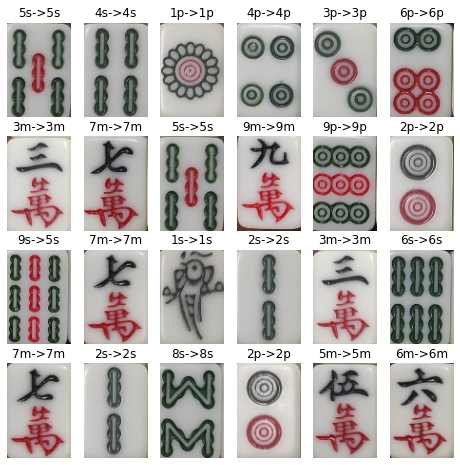

In [10]:
show()